This is an example Notebook for a full analysis of the Decision Tree for a Subset of our Dataset:

    -Data perperation
    -Grid_Search for model parameters
    -Model Analysis

In [ ]:
import  joblib

import  numpy                   as  np
import  pandas                  as  pd
import  seaborn                 as  sns
import  matplotlib              as  mpl
import  matplotlib.pyplot       as  plt

from    warnings                import  simplefilter

from    sklearn.svm             import SVC
from    sklearn.tree            import DecisionTreeClassifier, plot_tree
from    sklearn.metrics         import accuracy_score, classification_report, confusion_matrix
from    sklearn.pipeline        import make_pipeline
from    sklearn.ensemble        import RandomForestClassifier
from    sklearn.neighbors       import KNeighborsClassifier
from    sklearn.linear_model    import LogisticRegression
from    sklearn.model_selection import GridSearchCV, train_test_split

# Set high-resolution matplotlib plots
mpl.rcParams['figure.dpi'] = 300

# Disable scikit warnings
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

In [145]:
# Load dataset file
dataset = pd.read_csv(r"./Dataset/dataset.csv")

### **Data Preparation**

In [146]:
def clean_data(x):                                                                            #we define a "cleaning" function which removes any spaces in front or after the string
    if isinstance(x, str):                                                                    #Check if (object,type)
        return x.strip().replace("  ", " ").replace(" _", "_").replace("_ ", "_")             #eemove spaces from both ends of the string
    else:
        return x  


# apply the function to each column
for col in dataset.columns:
    dataset[col] = dataset[col].map(clean_data)

#we now will make the checklist of all symptoms
#List of symptom columns
symptom_cols = [
    'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5',
    'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10',
    'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15',
    'Symptom_16', 'Symptom_17'
]
#create the empty list to store all symptoms
all_symptoms = []

for col in symptom_cols:                           # go through each Symptom_1 to Symptom_17 column
    for symptom in dataset[col]:                   # go through every value in that column
        if pd.notna(symptom):                      # check if the cell is not nan
            all_symptoms.append(symptom)           # add it to the list

unique_symptoms = sorted(list(set(all_symptoms)))  #to remove the duplicates with set, we make them again a list (makes it usable for indexing and loops) and we soort them alphabetically in order to read them easier


#create a list of all diseases
disease_list = dataset['Disease'].unique()      #we use the unique function to get all diseases

#print how many symptoms we found
print("Number of unique symptoms:", len(unique_symptoms))
print("Symptoms:", unique_symptoms)

print("Number of unique diseases:", len(disease_list))
print("Symptoms:", disease_list)

binary = pd.DataFrame()                  #Create a new, empty table (DataFrame) named binary to hold the simplified data
binary['Disease'] = dataset['Disease']  #Copy the disease column from the original dataset (dataset) into the binary table

#for each syptom we check ecah row
for symptom in unique_symptoms:
    binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
#so what we basically did : For each symptom in your list, check every patient.Mark 1 if the patient has this symptom anywhere, or 0 if not

Number of unique symptoms: 131
Symptoms: ['abdominal_pain', 'abnormal_menstruation', 'acidity', 'acute_liver_failure', 'altered_sensorium', 'anxiety', 'back_pain', 'belly_pain', 'blackheads', 'bladder_discomfort', 'blister', 'blood_in_sputum', 'bloody_stool', 'blurred_and_distorted_vision', 'breathlessness', 'brittle_nails', 'bruising', 'burning_micturition', 'chest_pain', 'chills', 'cold_hands_and_feets', 'coma', 'congestion', 'constipation', 'continuous_feel_of_urine', 'continuous_sneezing', 'cough', 'cramps', 'dark_urine', 'dehydration', 'depression', 'diarrhoea', 'dischromic_patches', 'distention_of_abdomen', 'dizziness', 'drying_and_tingling_lips', 'enlarged_thyroid', 'excessive_hunger', 'extra_marital_contacts', 'family_history', 'fast_heart_rate', 'fatigue', 'fluid_overload', 'foul_smell_of urine', 'headache', 'high_fever', 'hip_joint_pain', 'history_of_alcohol_consumption', 'increased_appetite', 'indigestion', 'inflammatory_nails', 'internal_itching', 'irregular_sugar_level', '

We are only using a small subset of the whole Dataset

In [147]:
#subset consits of only these diseases 'Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
subset  = binary[binary['Disease'].isin(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis', 'Drug Reaction'])]

#save_subset
subset.to_csv(r"./Dataset/subset.csv", index=False)  # Save the subset to a new CSV file

#Prepare the data
X_binary = subset.drop(columns=['Disease'])  # All columns except Disease
y_binary = subset['Disease']  # Target column

#Split the data
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_binary, y_binary, test_size=0.7, random_state=42)

### **Decision Tree**

In [148]:
param_grid = {'ccp_alpha': [0.1, .01, .001, .0001],
              'max_depth' : range(4,10),
              'criterion' :['gini', 'entropy','log_loss'],
             }

model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train_bin, y_train_bin)

final_model = grid_search.best_estimator_

#Save the model
joblib.dump(final_model, './Models_Subset/decision_tree_model.pkl')

print(final_model)

# Train
final_model.fit(X_train_bin, y_train_bin)

# Prediction
predictions = final_model.predict(X_test_bin)

# Evaluation
print(classification_report(y_test_bin, predictions))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=5,
                       random_state=42)
                     precision    recall  f1-score   support

            Allergy       1.00      1.00      1.00        83
Chronic cholestasis       1.00      0.93      0.96        82
      Drug Reaction       1.00      1.00      1.00        86
   Fungal infection       1.00      1.00      1.00        83
               GERD       0.93      1.00      0.97        86

           accuracy                           0.99       420
          macro avg       0.99      0.99      0.99       420
       weighted avg       0.99      0.99      0.99       420



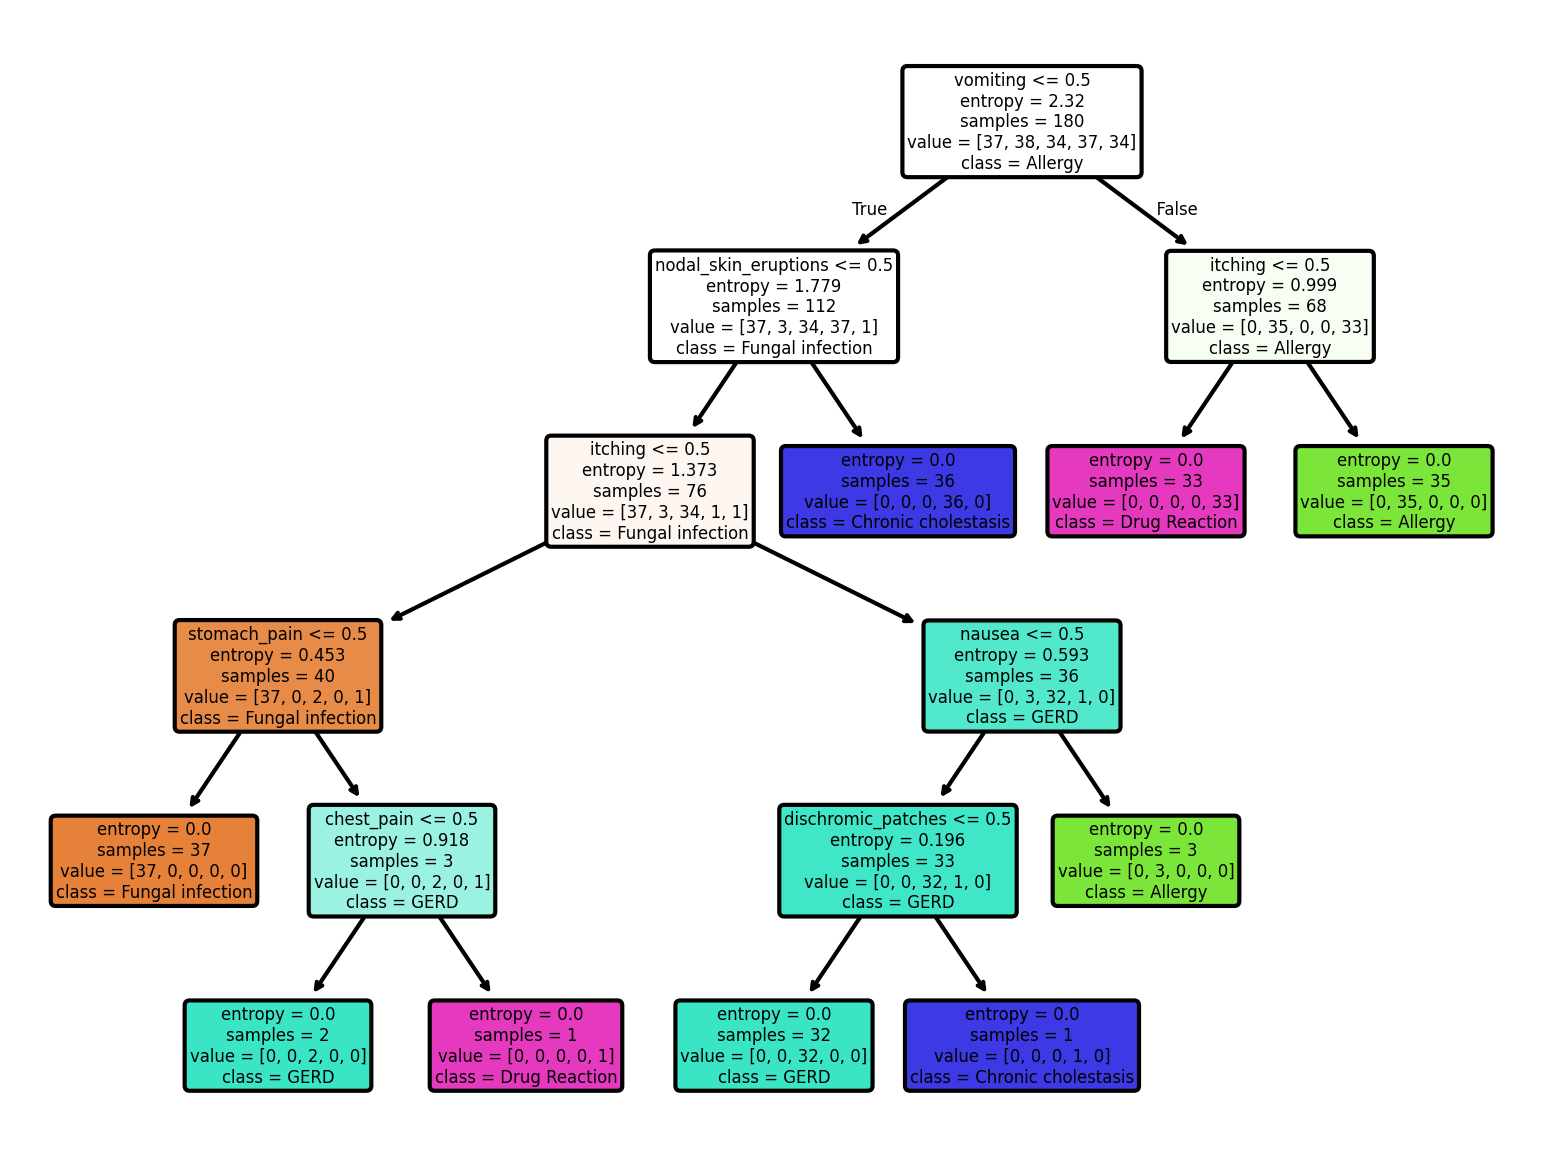

In [149]:
# Plot decision tree
plot_tree(final_model, filled=True, feature_names=X_binary.columns, class_names=y_binary.unique(), rounded=True)
# Save plot
plt.savefig("./Plots/Classifier_Subset/tree_graph.pdf")
# Show plot
plt.show()

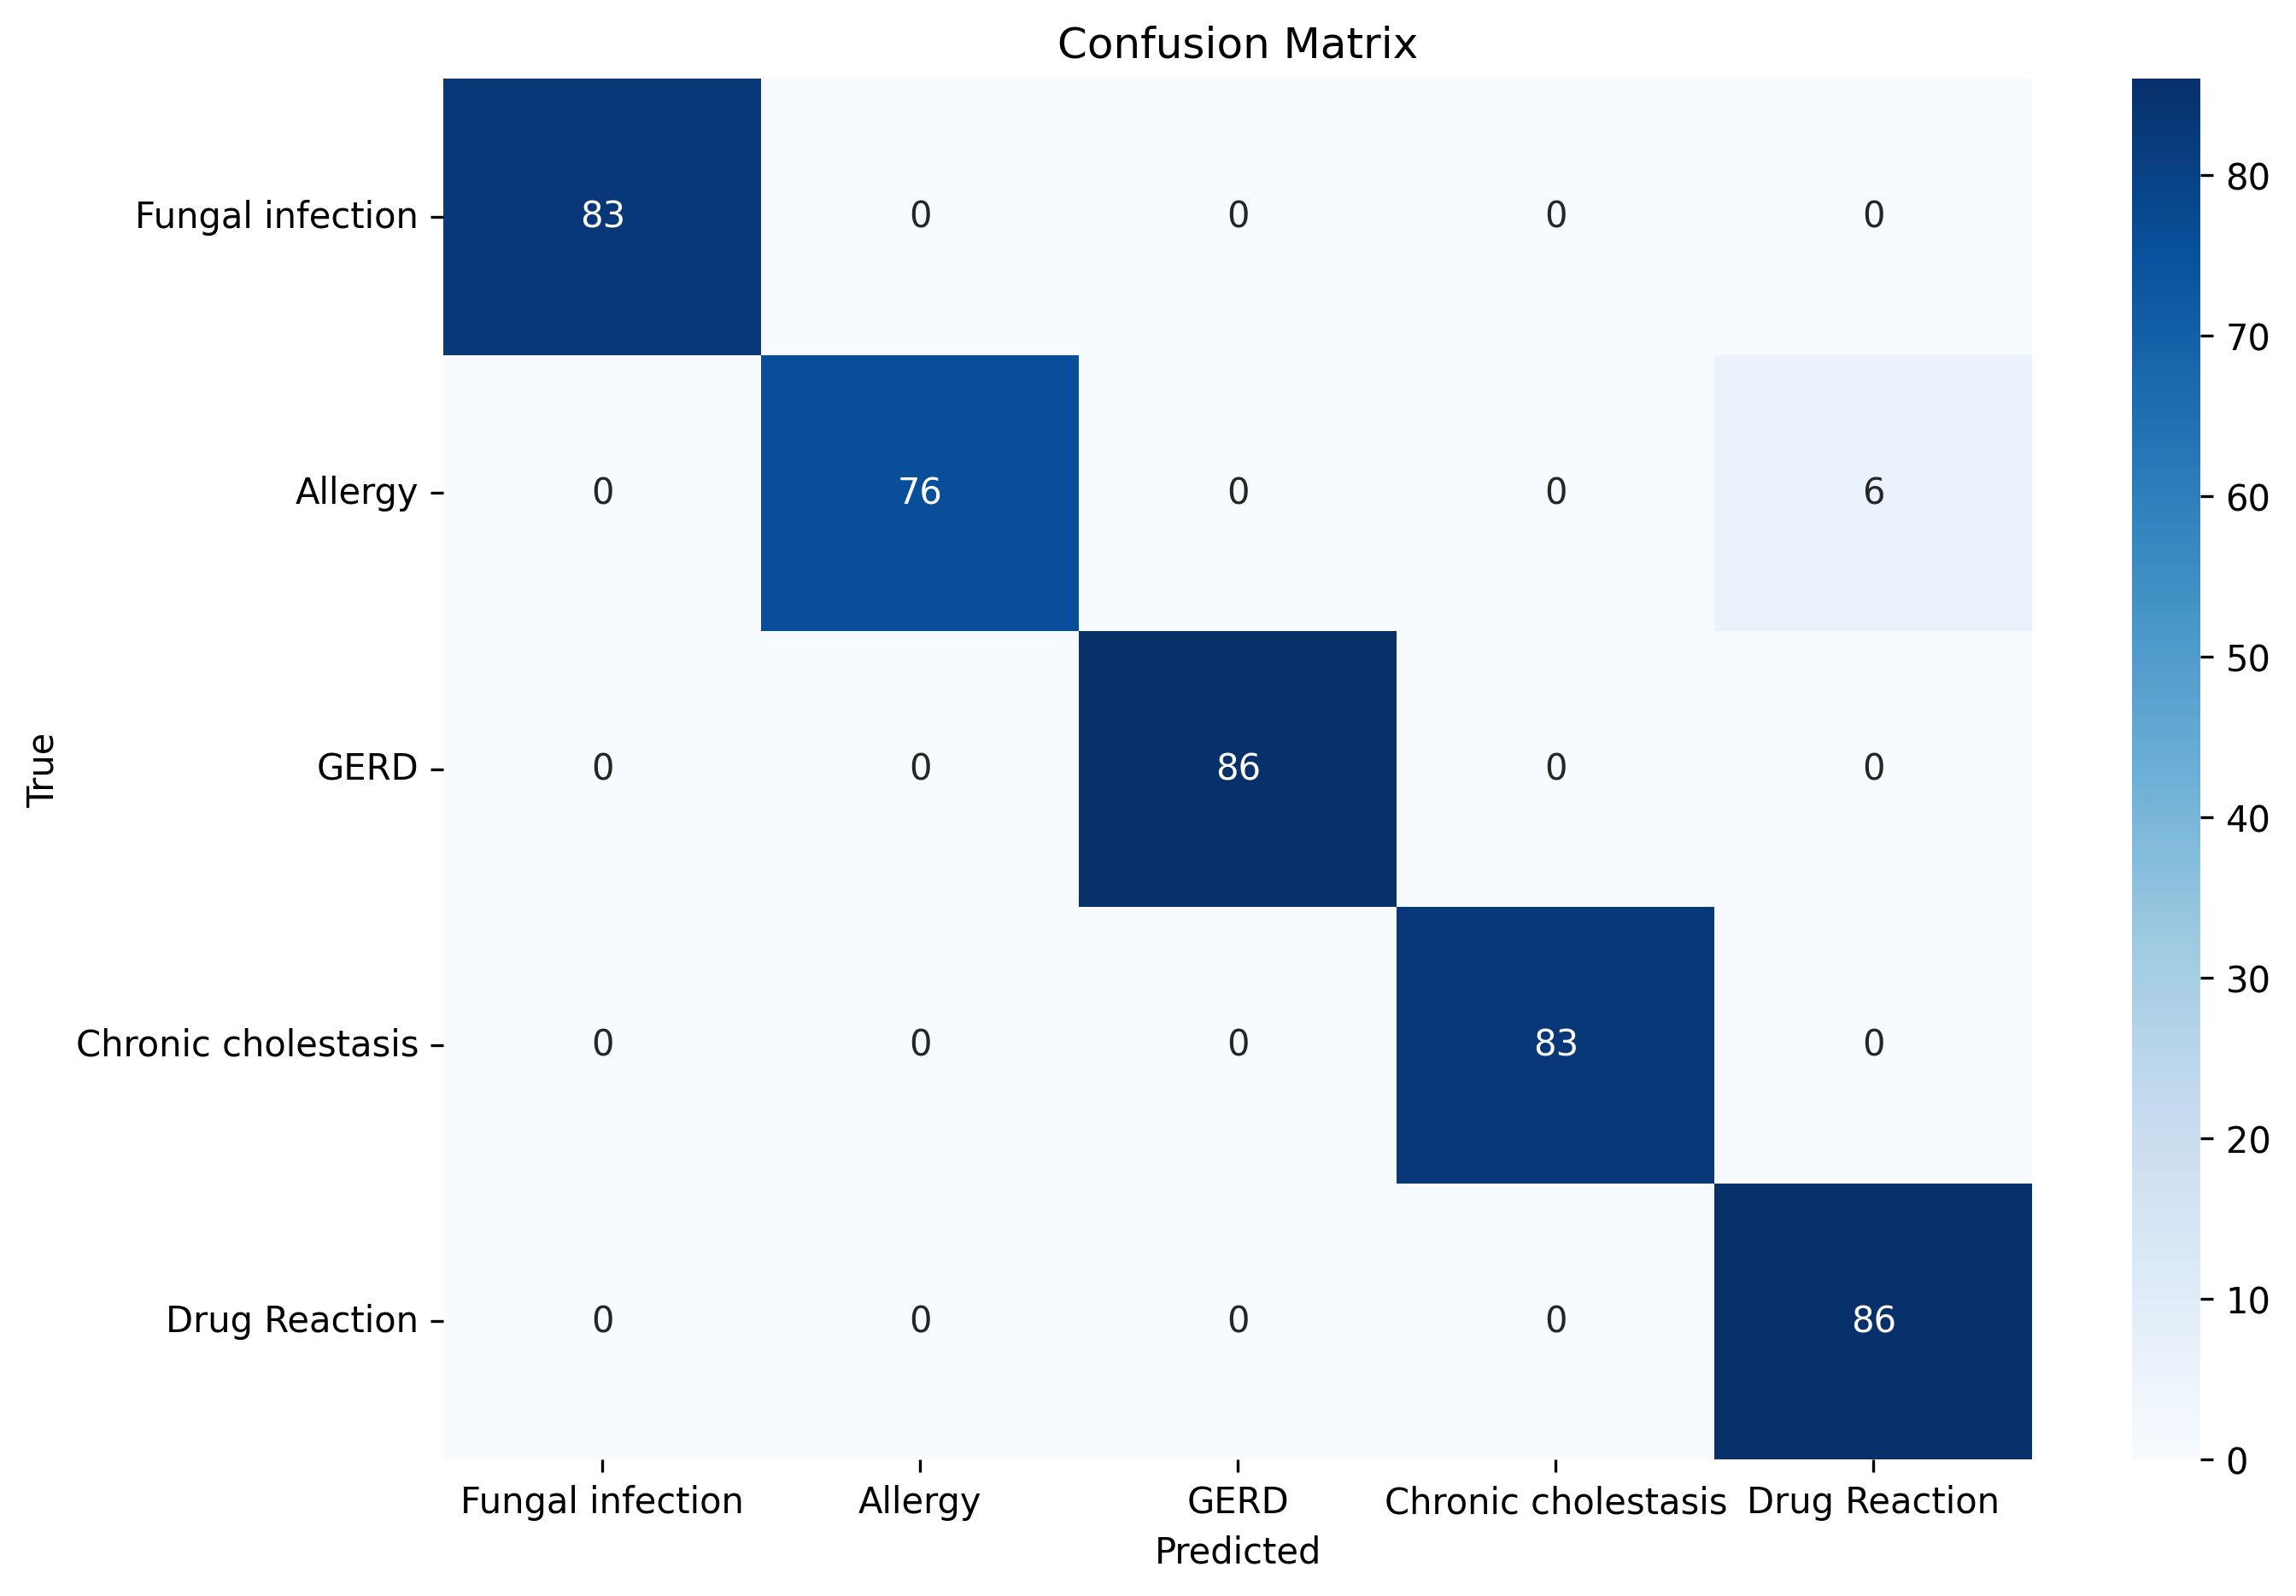

In [150]:
# Create confusion matrix
cm = confusion_matrix(y_test_bin, predictions)
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y_binary.unique(), yticklabels=y_binary.unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### **Random Forest**

In [151]:
param_grid = {'n_estimators': [1,2,5,10,20],
              'max_depth' : range(2,8),
              'criterion' :['gini', 'entropy','log_loss'],
             }

model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train_bin, y_train_bin)

final_model = grid_search.best_estimator_

# Save model
joblib.dump(final_model, './models_subset/random_forest_model.pkl')
print(final_model)

# Train
final_model.fit(X_train_bin, y_train_bin)

# Prediction
predictions = final_model.predict(X_test_bin)

# Evaluation
print(classification_report(y_test_bin, predictions))

Fitting 5 folds for each of 90 candidates, totalling 450 fits
RandomForestClassifier(max_depth=2, n_estimators=10, random_state=42)
                     precision    recall  f1-score   support

            Allergy       1.00      1.00      1.00        83
Chronic cholestasis       1.00      1.00      1.00        82
      Drug Reaction       1.00      1.00      1.00        86
   Fungal infection       1.00      1.00      1.00        83
               GERD       1.00      1.00      1.00        86

           accuracy                           1.00       420
          macro avg       1.00      1.00      1.00       420
       weighted avg       1.00      1.00      1.00       420



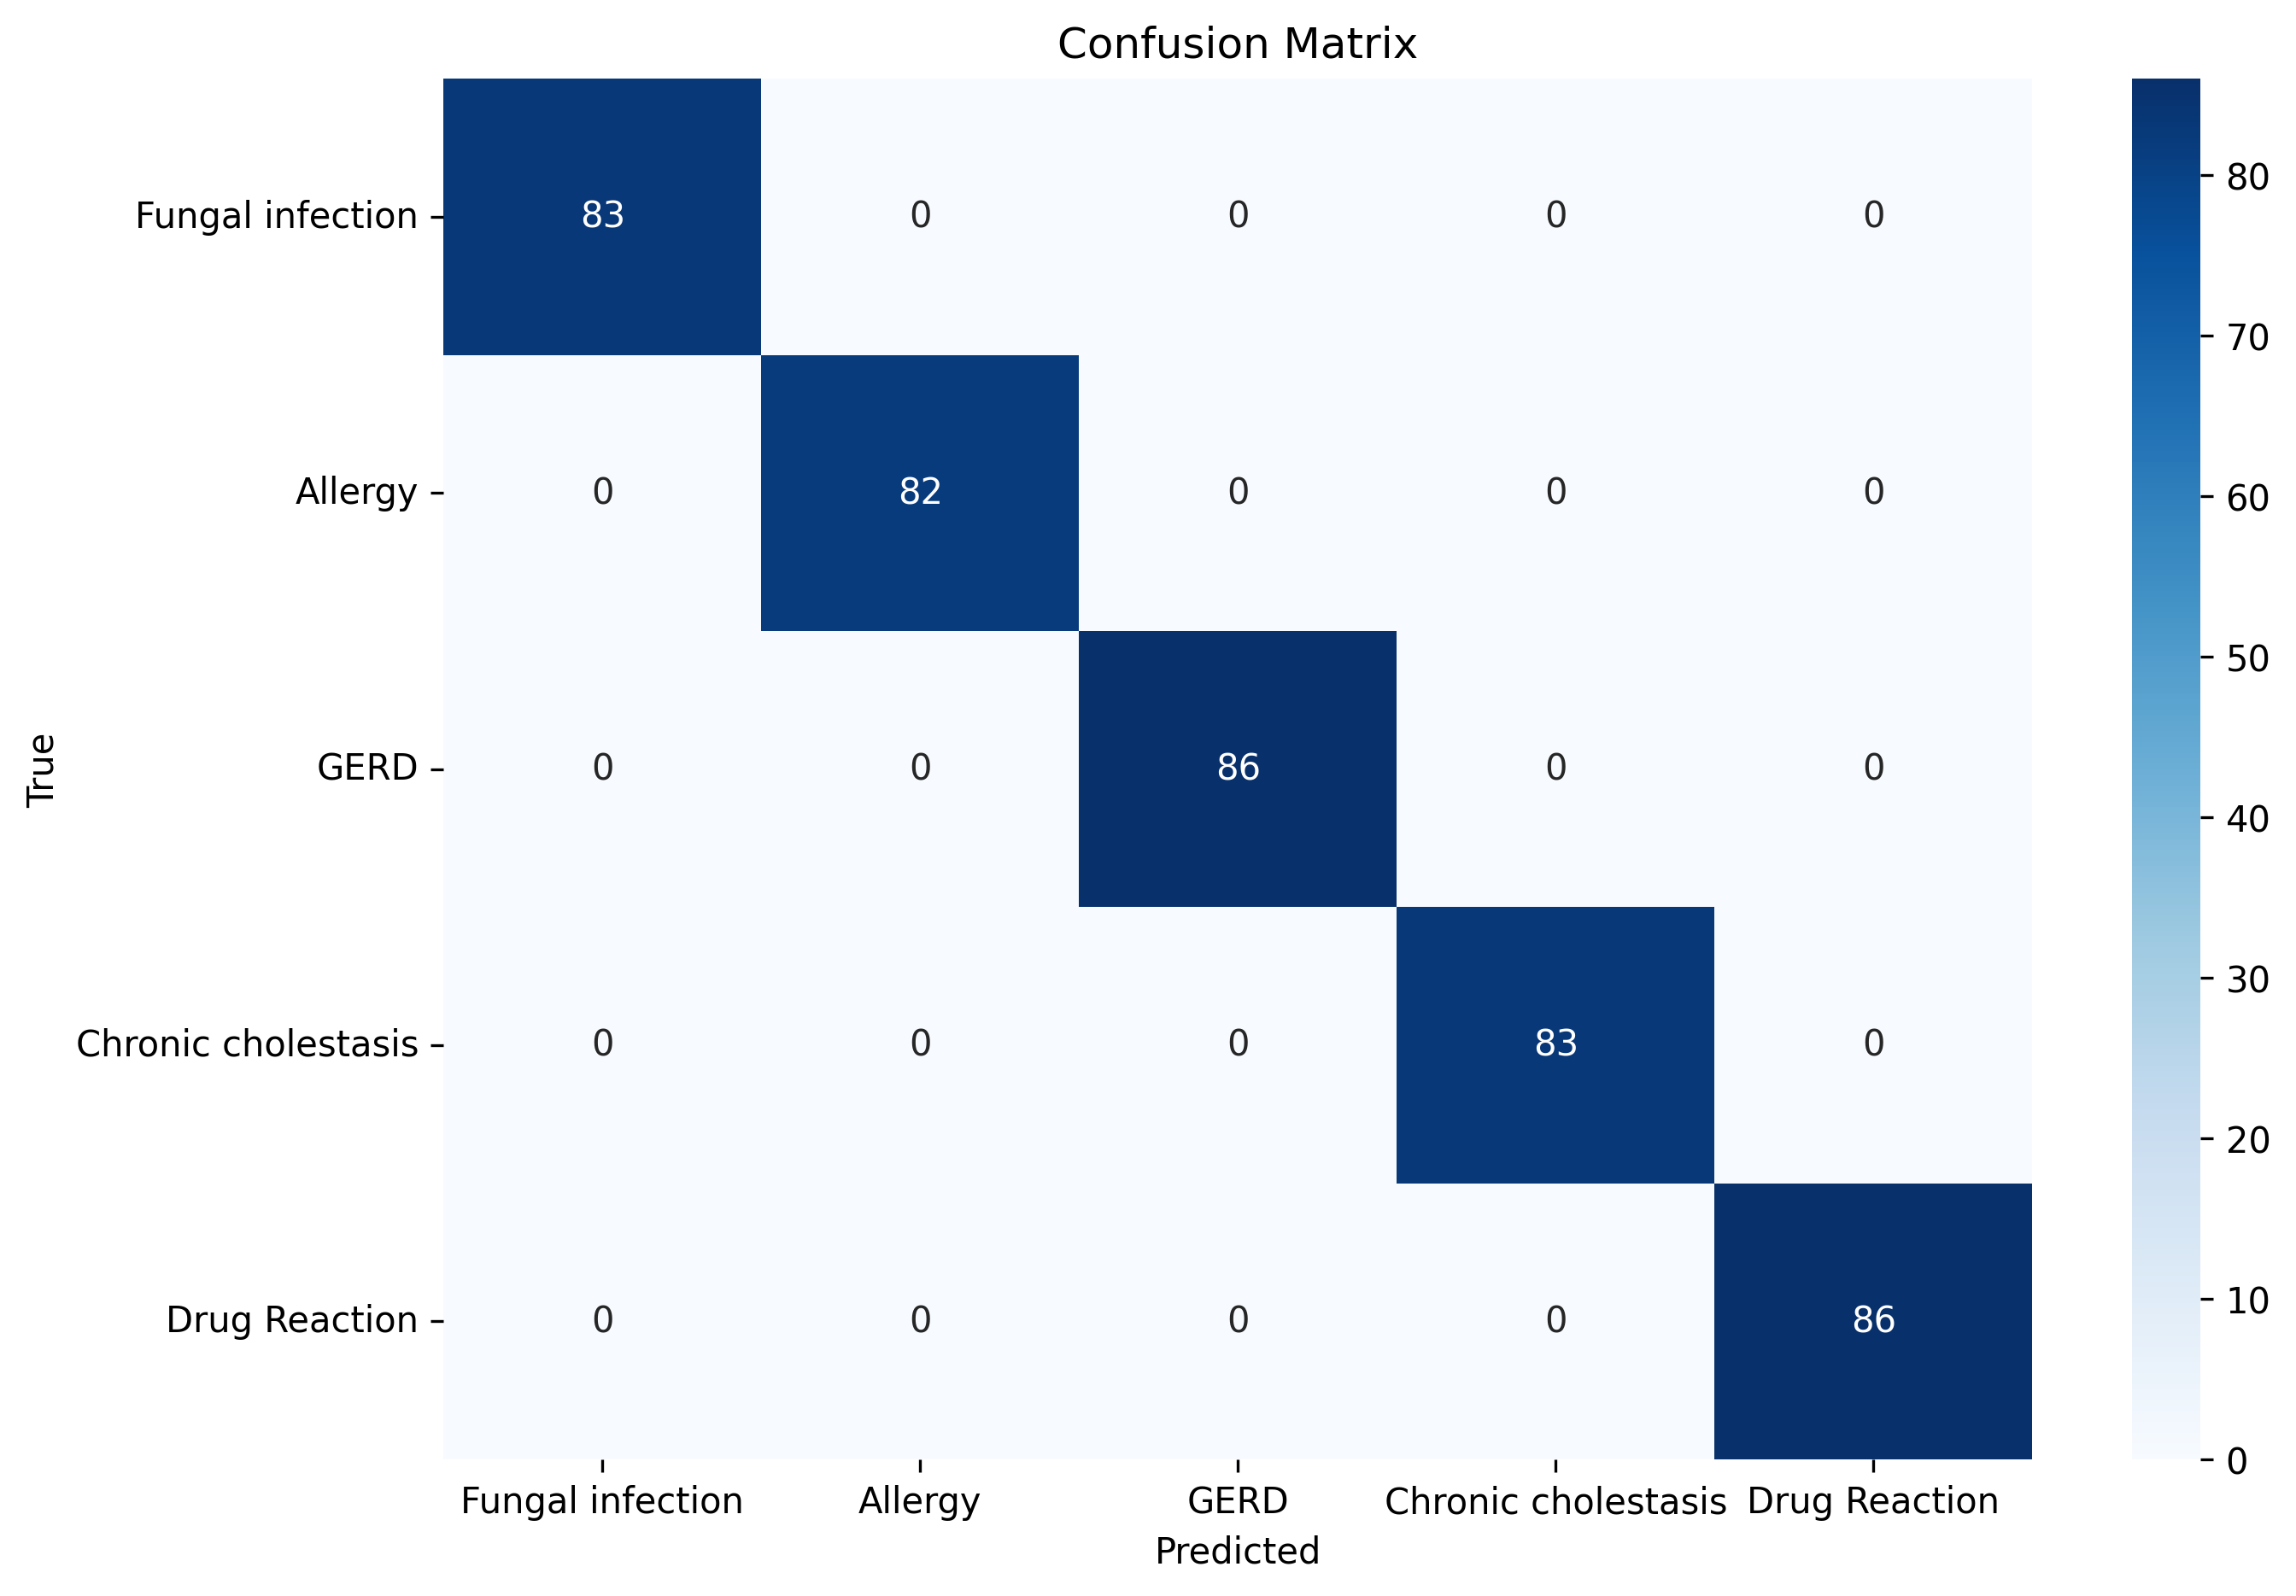

In [152]:
# Create confusion matrix
cm = confusion_matrix(y_test_bin, predictions)
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y_binary.unique(), yticklabels=y_binary.unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### **Logic Regression**

In [153]:
# Create a pipeline with StandardScaler and LogisticRegression

param_grid = {'tol' : [0.1, .2, .5, 1],
              'max_iter' : [1,2,5,10,20],
              'solver' :['lbfgs', 'newton-cg', 'sag', 'saga'],
             }

# Create a logistic regression model
model = LogisticRegression(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train_bin, y_train_bin)

final_model = grid_search.best_estimator_
joblib.dump(final_model, './Models_Subset/logistic_regression_model.pkl')
print(final_model)


# Train
final_model.fit(X_train_bin, y_train_bin)


# Prediction
predictions = final_model.predict(X_test_bin)

# Evaluation
print(classification_report(y_test_bin, predictions))

Fitting 5 folds for each of 80 candidates, totalling 400 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

LogisticRegression(max_iter=1, random_state=42, tol=0.1)
                     precision    recall  f1-score   support

            Allergy       1.00      1.00      1.00        83
Chronic cholestasis       1.00      1.00      1.00        82
      Drug Reaction       1.00      1.00      1.00        86
   Fungal infection       1.00      1.00      1.00        83
               GERD       1.00      1.00      1.00        86

           accuracy                           1.00       420
          macro avg       1.00      1.00      1.00       420
       weighted avg       1.00      1.00      1.00       420



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

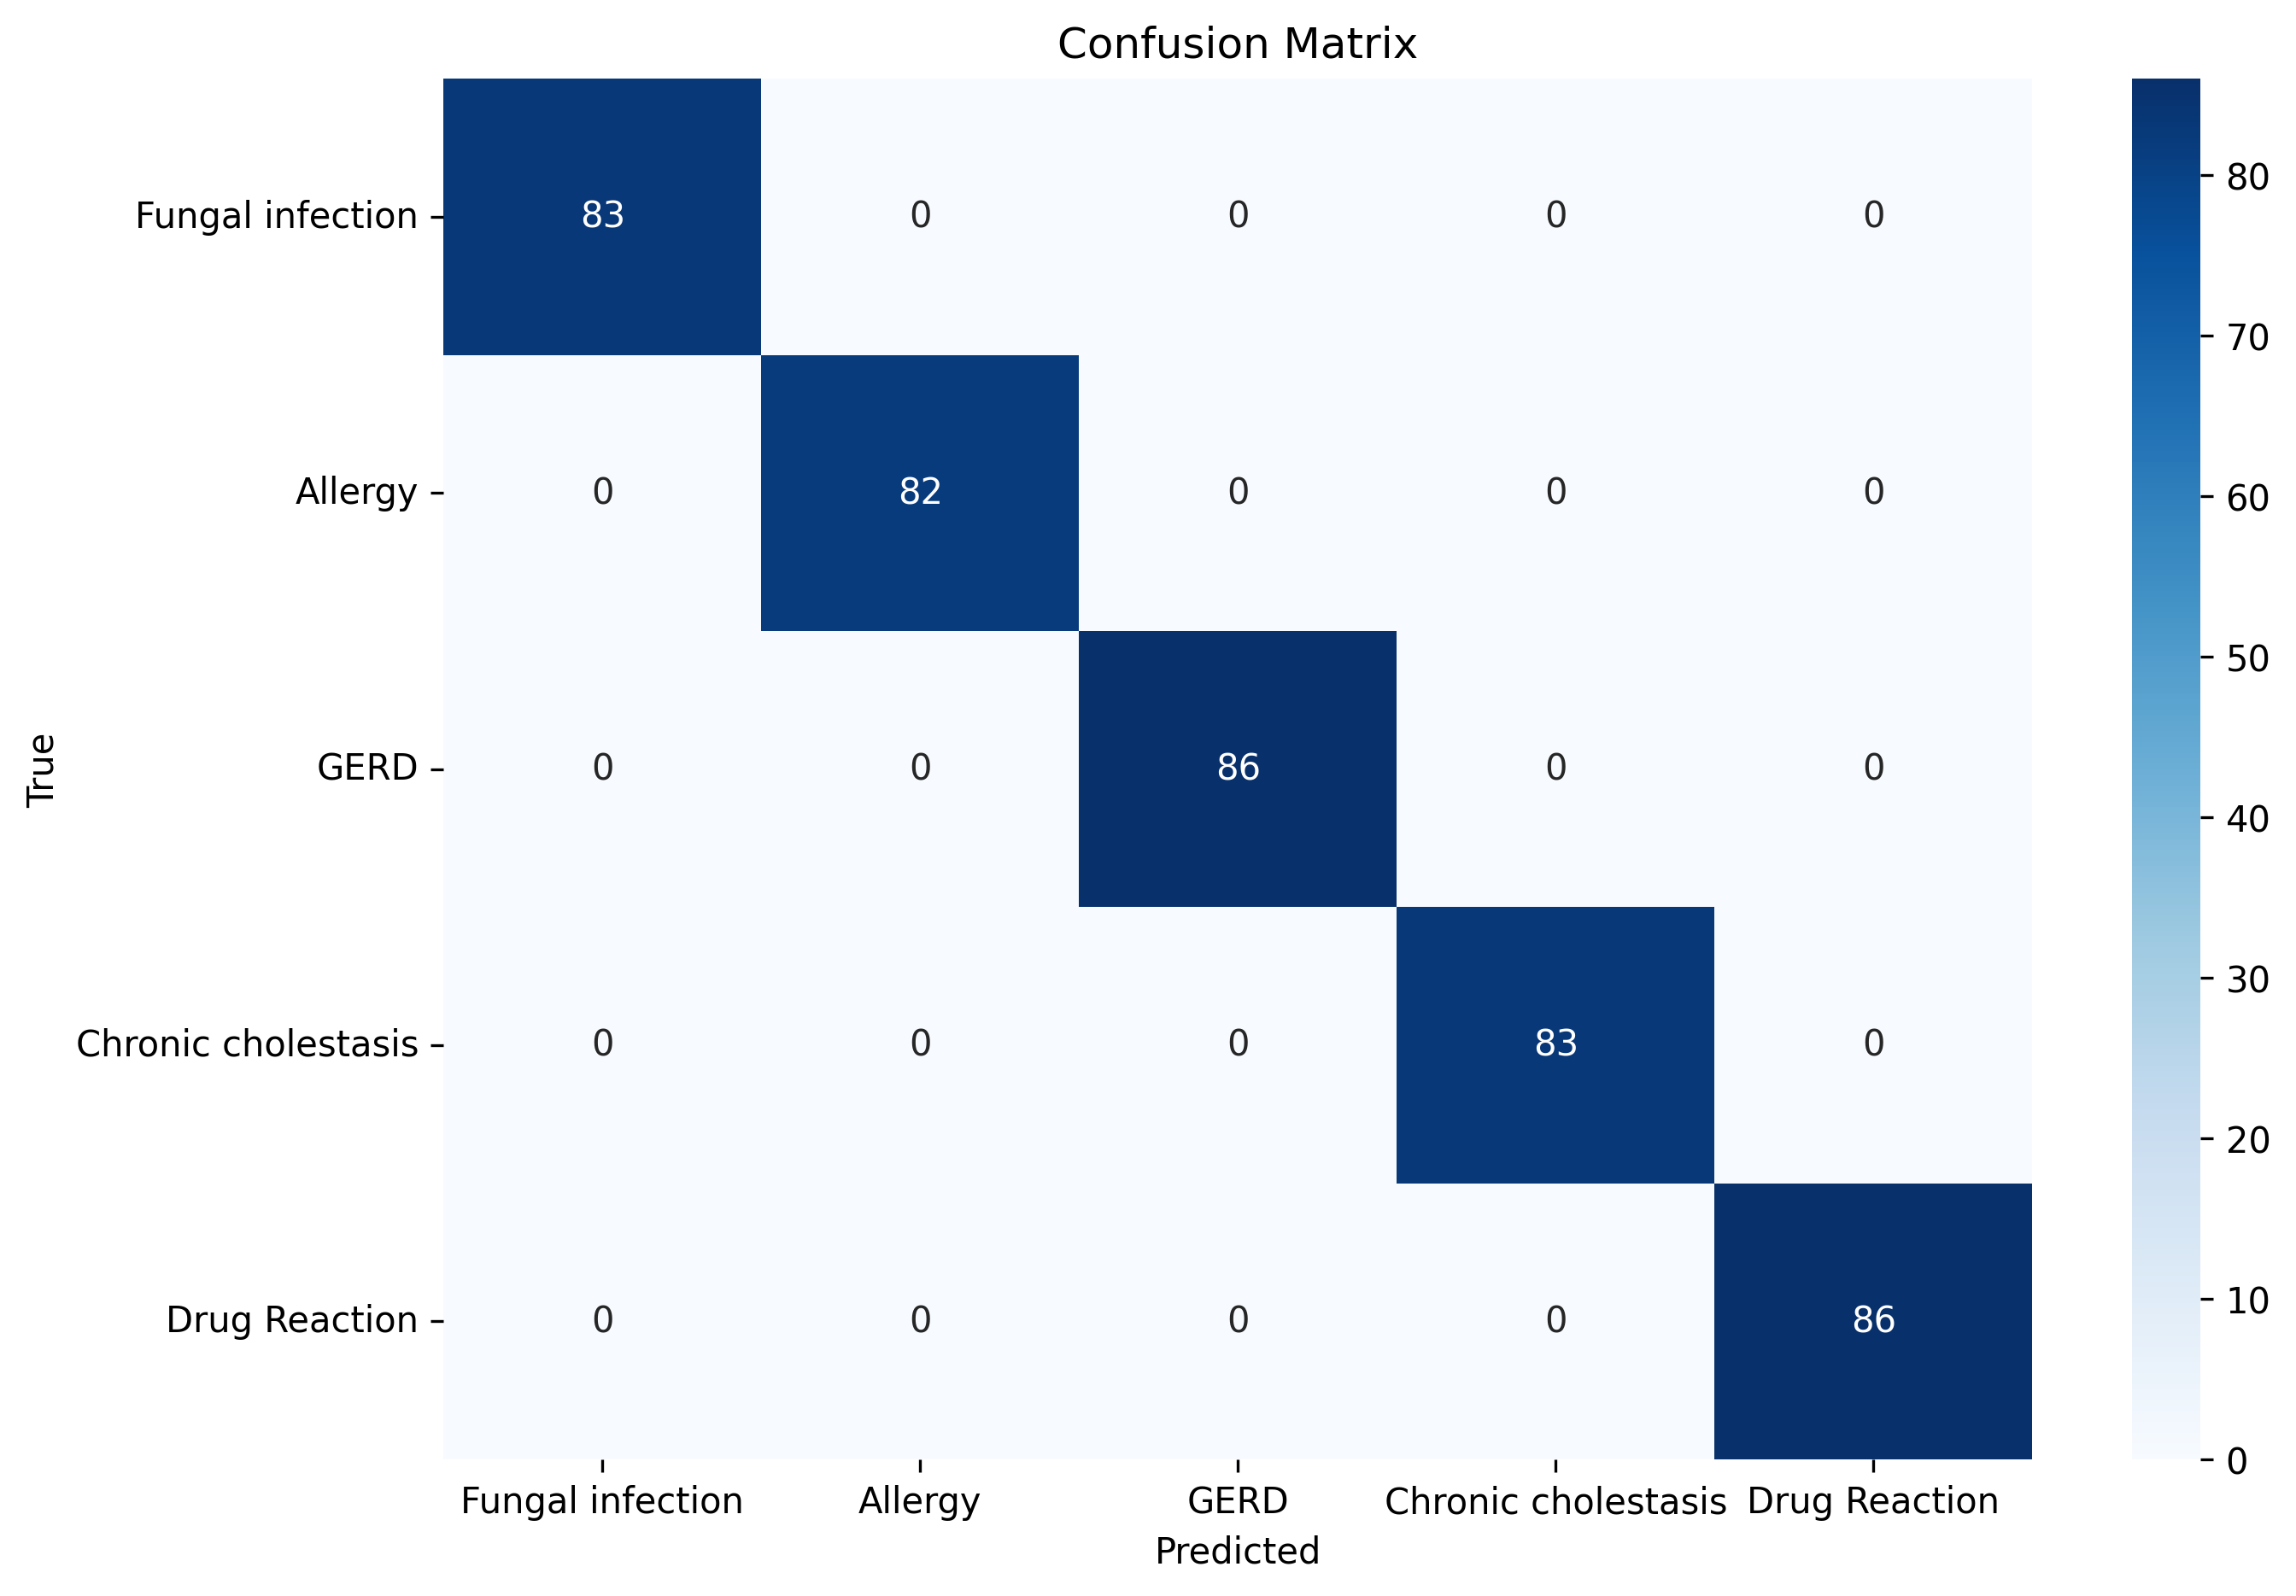

In [154]:
cm = confusion_matrix(y_test_bin, predictions)
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y_binary.unique(), yticklabels=y_binary.unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### **Support Vector Machine**

In [155]:
#SVM

param_grid = {'C' : [0.1, .2, .5, 1],
              'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree' : [1,2,3,4],
             }

# Create a logistic regression model
model = SVC(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train_bin, y_train_bin)
final_model = grid_search.best_estimator_
joblib.dump(final_model, './Models_Subset/support_vector_model.pkl')
print(final_model)
# Train
final_model.fit(X_train_bin, y_train_bin)
# Prediction
predictions = final_model.predict(X_test_bin)

# Evaluation
print(classification_report(y_test_bin, predictions))


Fitting 5 folds for each of 64 candidates, totalling 320 fits
SVC(C=0.1, degree=1, kernel='linear', random_state=42)
                     precision    recall  f1-score   support

            Allergy       1.00      1.00      1.00        83
Chronic cholestasis       1.00      1.00      1.00        82
      Drug Reaction       1.00      1.00      1.00        86
   Fungal infection       1.00      1.00      1.00        83
               GERD       1.00      1.00      1.00        86

           accuracy                           1.00       420
          macro avg       1.00      1.00      1.00       420
       weighted avg       1.00      1.00      1.00       420



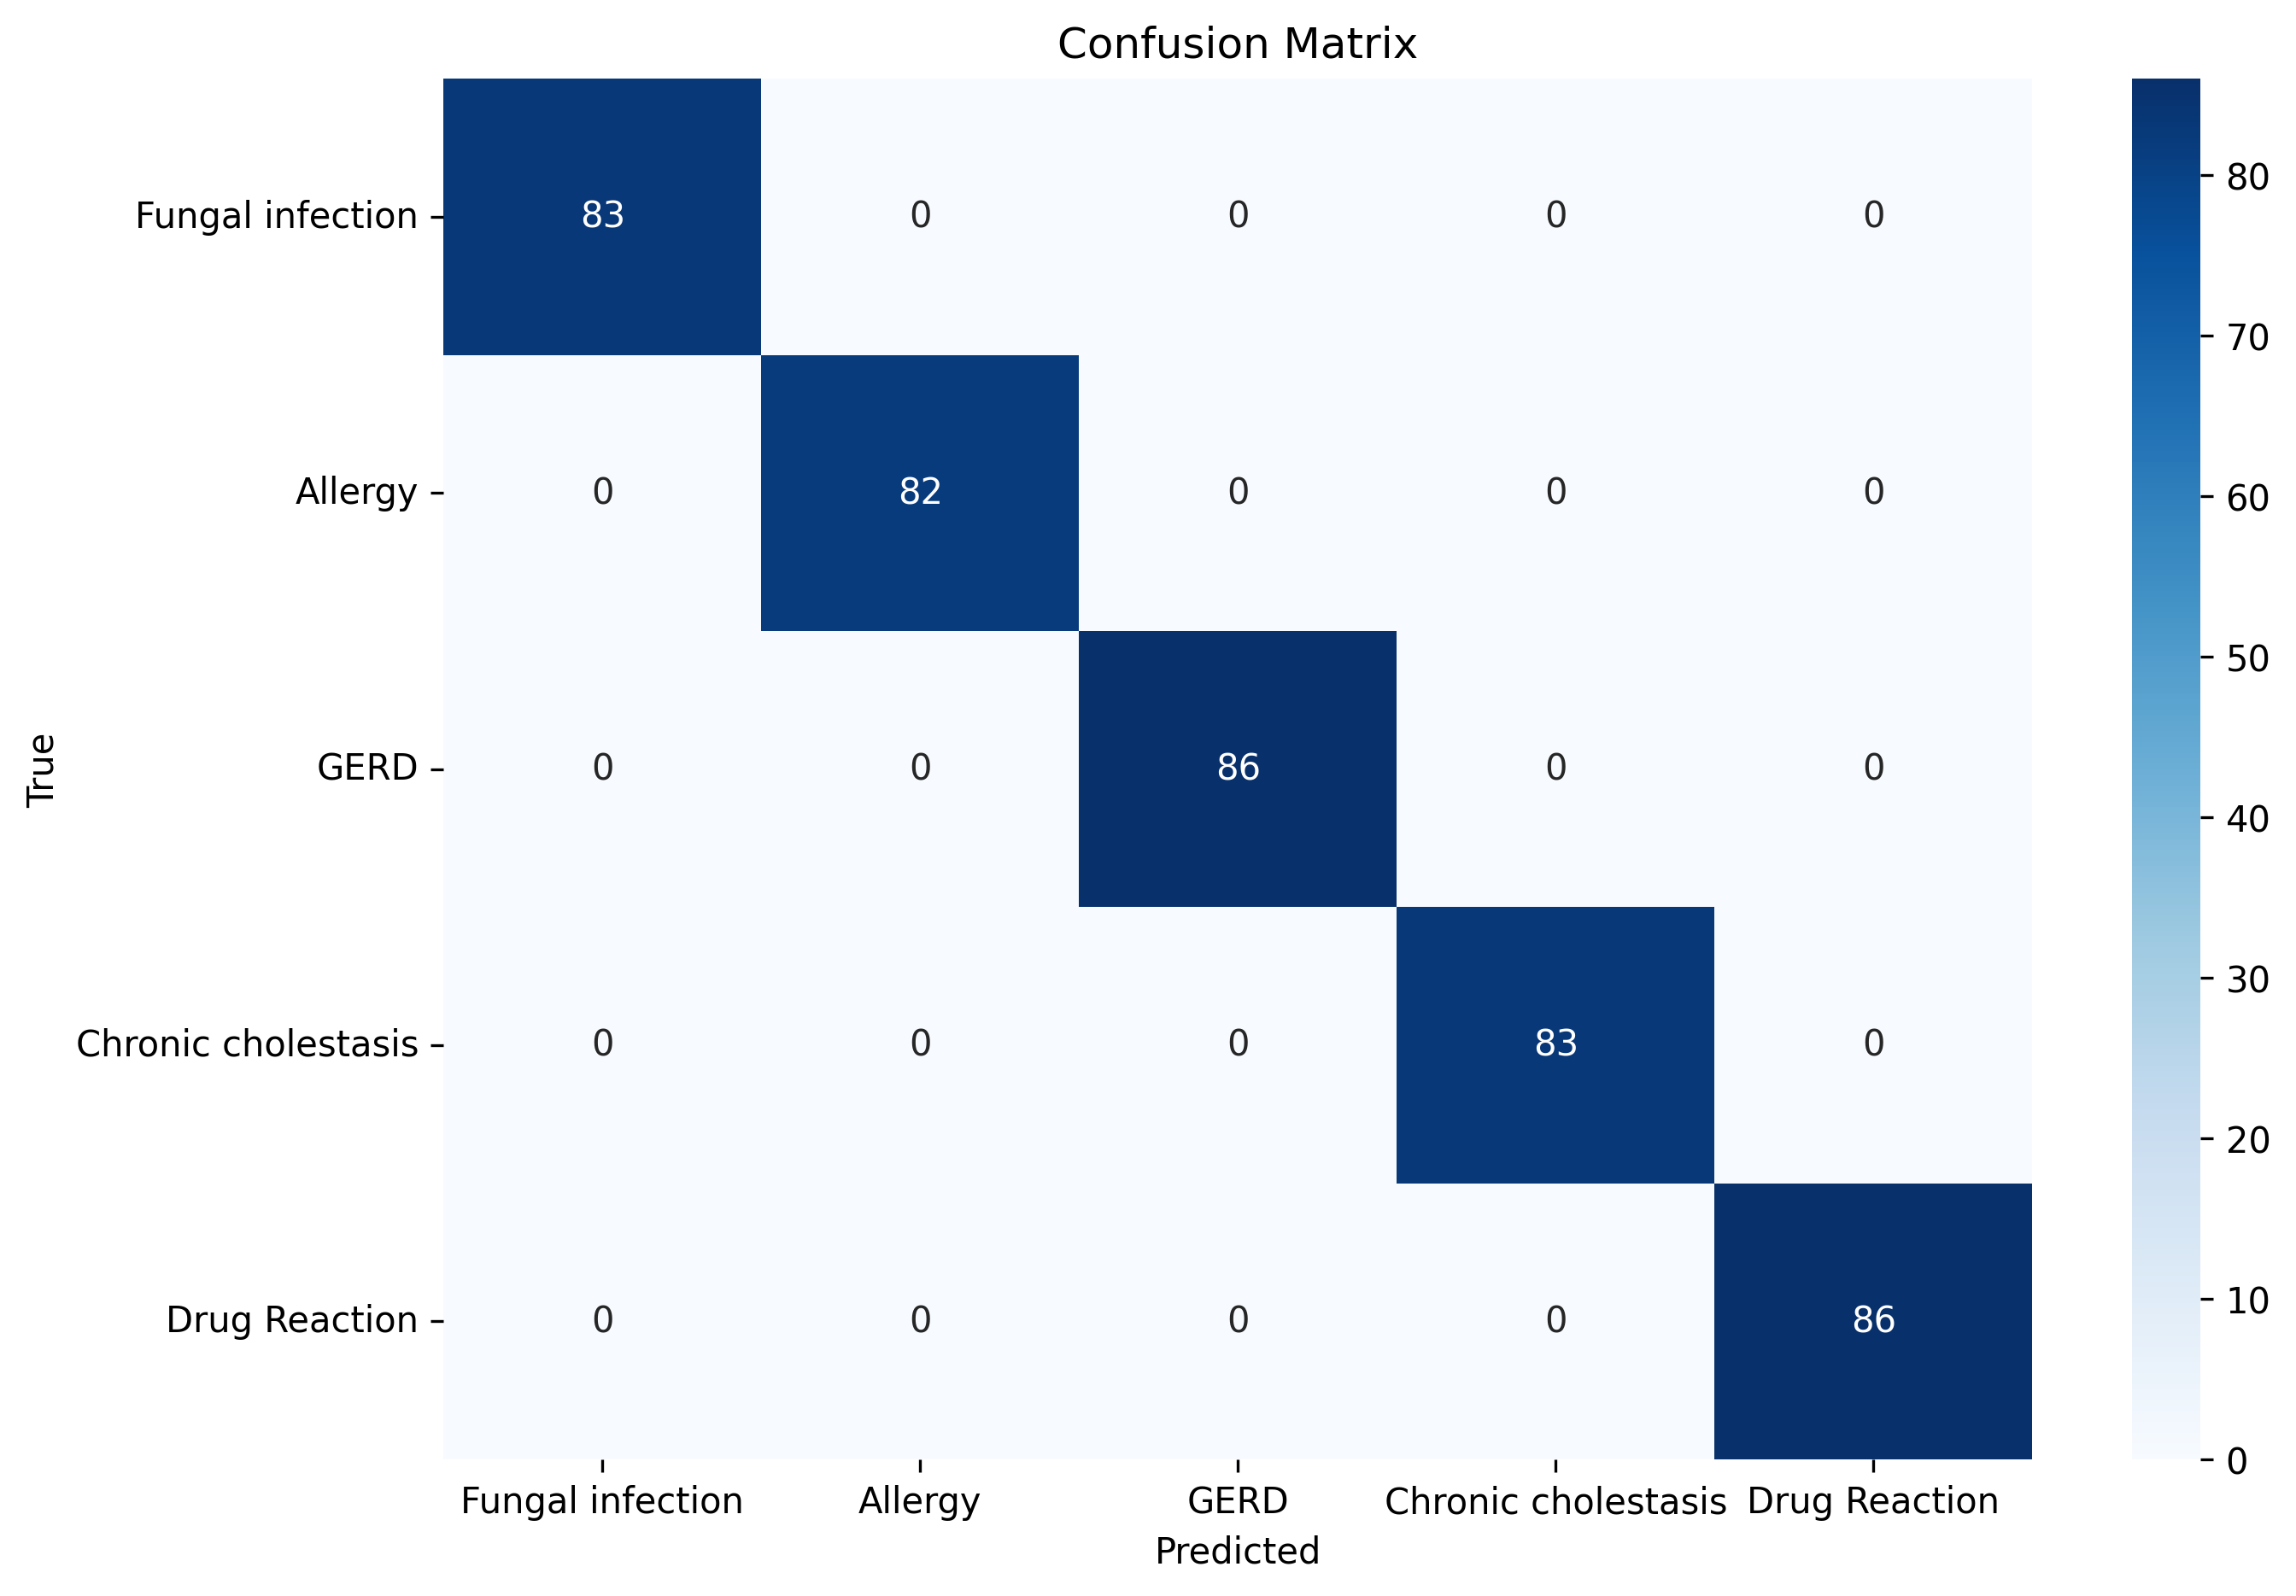

In [156]:
cm = confusion_matrix(y_test_bin, predictions)
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y_binary.unique(), yticklabels=y_binary.unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### **K-Nearest Neighbor**

In [157]:
# Define parameters for the KNN model
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40, 50],
}

model = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train_bin, y_train_bin)

final_model = grid_search.best_estimator_

# Save model
joblib.dump(final_model, './Models_Subset/k_nearest_neighbors_model.pkl')
print(final_model)

# Train
final_model.fit(X_train_bin, y_train_bin)

# Prediction
predictions = final_model.predict(X_test_bin)

# Evaluation
print(classification_report(y_test_bin, predictions))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
KNeighborsClassifier(leaf_size=20, n_neighbors=3)
                     precision    recall  f1-score   support

            Allergy       1.00      1.00      1.00        83
Chronic cholestasis       1.00      1.00      1.00        82
      Drug Reaction       1.00      1.00      1.00        86
   Fungal infection       1.00      1.00      1.00        83
               GERD       1.00      1.00      1.00        86

           accuracy                           1.00       420
          macro avg       1.00      1.00      1.00       420
       weighted avg       1.00      1.00      1.00       420



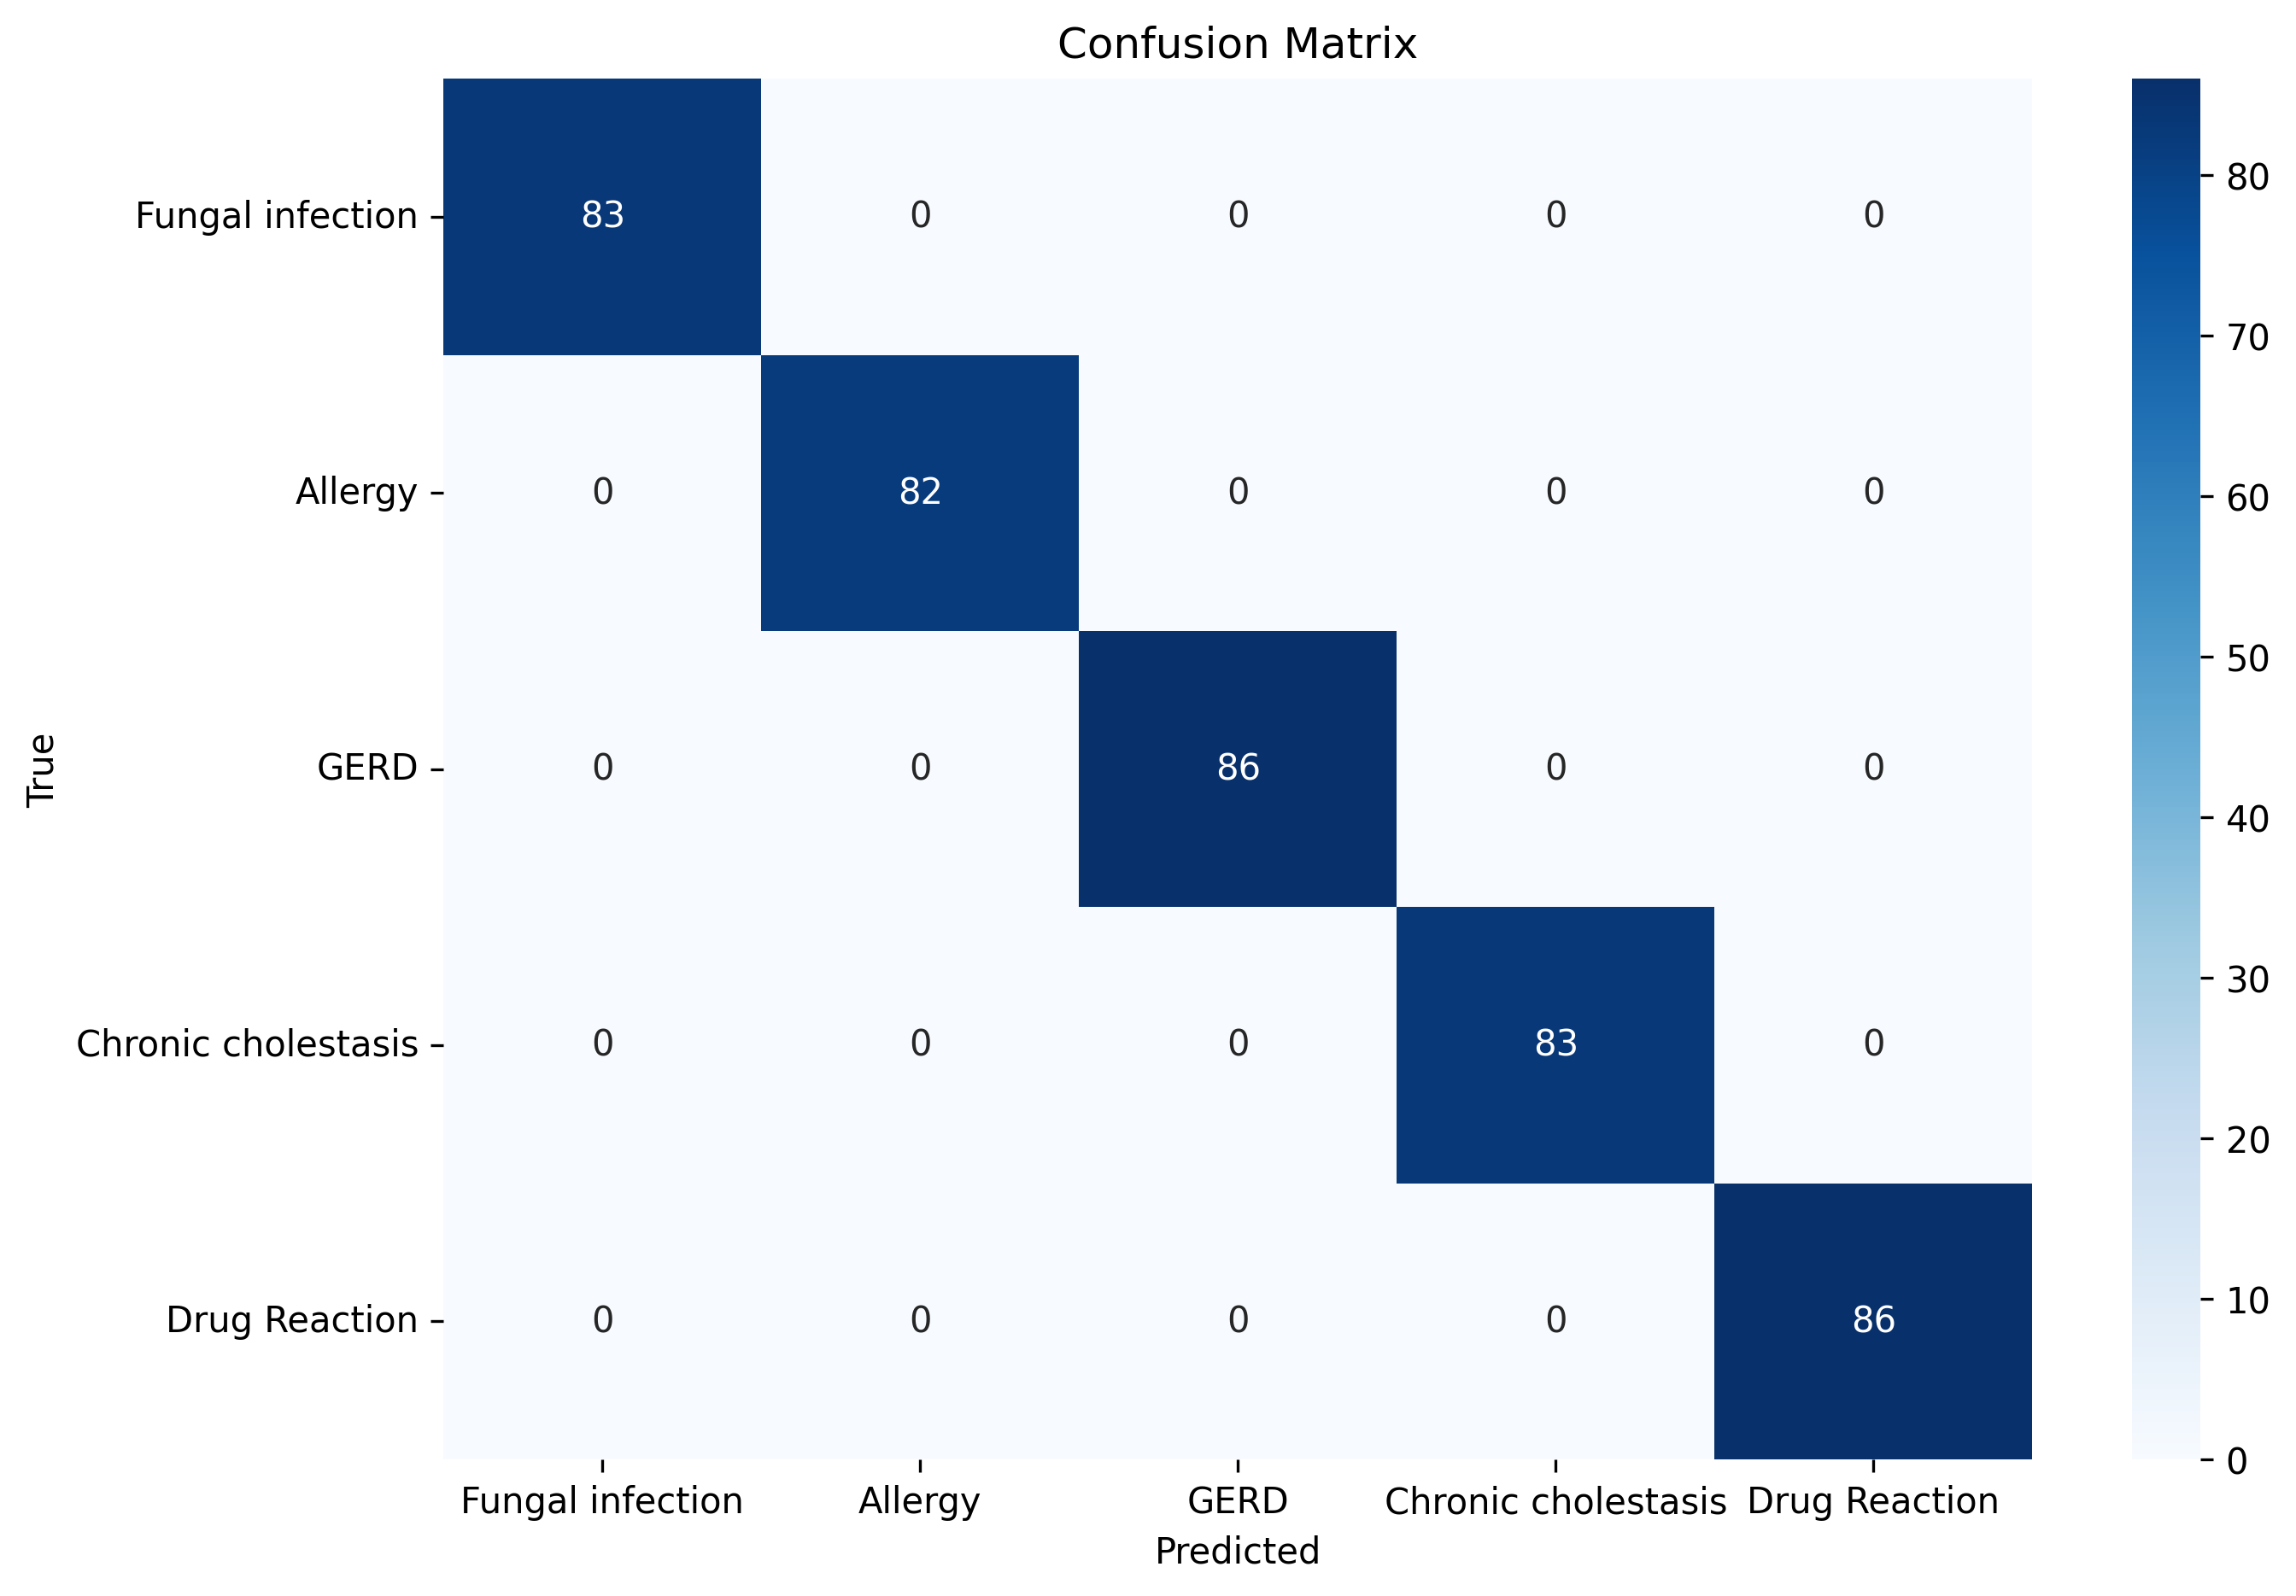

In [158]:
cm = confusion_matrix(y_test_bin, predictions)
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y_binary.unique(), yticklabels=y_binary.unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()